# **COVID 19 PANDEMIC**




**STEPS TO BE PERFORMED:**

•Preprocessing of Data

•Forecasting using FbProphet for 30 days





**QUESTIONS TO BE ANSWERED:**

•Which country/state is having highest number of cases?

•Which country/state is having lowest number of cases?

•Which country/state is having lowest number of deaths?

•Which country/state is having highest number of deaths?





In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 1: Importation**

In [16]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
#importing data
df = pd.read_csv('/content/drive/MyDrive/Python and DS/Major Project/owid-covid-data.csv')
print("Data imported sucessfully.\n\n\n")

#checking the sucessful importation of data
df.head()

Data imported sucessfully.





,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [18]:
#to get no. of rows and columns
df.shape

(85579, 59)

Hence we see 86436 rows and 59 columns.


**Step 3: Processing**

In [19]:
df.isnull().sum()

iso_code                                     0
continent                                 4129
location                                     0
date                                         0
total_cases                               2109
new_cases                                 2111
new_cases_smoothed                        3112
total_deaths                             11789
new_deaths                               11631
new_deaths_smoothed                       3112
total_cases_per_million                   2560
new_cases_per_million                     2562
new_cases_smoothed_per_million            3558
total_deaths_per_million                 12227
new_deaths_per_million                   12069
new_deaths_smoothed_per_million           3558
reproduction_rate                        16637
icu_patients                             76890
icu_patients_per_million                 76890
hosp_patients                            74760
hosp_patients_per_million                74760
weekly_icu_ad

In [20]:
x=0
del_df= []
for i in df:
  if df[i].isnull().sum() > 30000:
    del_df.append(df.columns[x])
    temp_df = df.drop(del_df, axis=1)
  x = x+1
print("Data with higher null values: \n",del_df,"\n\n\n")
print(temp_df.shape)
print(temp_df['date'].max())
temp_df.isnull().sum()

Data with higher null values: 
 ['icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million', 'extreme_poverty', 'handwashing_facilities'] 



(85579, 31)
2021-05-02


iso_code                               0
continent                           4129
location                               0
date                                   0
total_cases                         2109
new_cases                           2111
new_cases_smoothed                  3112
total_deaths                       11789
new_deaths                         11631
new_deaths_smoothed                 3112
total_cases_per_million             2560
new_cases_per_million               2562
new_cases_smoothed_per_million      3558
total_deaths_per_million           12227
new_deaths_per_million             12069
new_deaths_smoothed_per_million     3558
reproduction_rate                  16637
stringency_index                   12906
population                           551
population_density                  5921
median_age                          8502
aged_65_older                       9382
aged_70_older                       8934
gdp_per_capita                      8162
cardiovasc_death

In [21]:
columns_with_more_zeros = ['total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']
temp_df[columns_with_more_zeros] = temp_df[columns_with_more_zeros].fillna(0)

In [22]:
temp_df = temp_df.dropna()

In [23]:
temp_df.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
reproduction_rate                  0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
cardiovasc_death_rate              0
diabetes_prevalence                0
female_smokers                     0
m

In [24]:
print("Data till date: ",temp_df['date'].max())

Data till date:  2021-04-29


**Questions:**

In [28]:
temp_df['total_cases'].index = range(0,68479)
temp_df['total_deaths'].index = range(0,68479)
temp_df['location'].index = range(0,68479)

max_index_case = temp_df['total_cases'][temp_df['total_cases'] == temp_df['total_cases'].max()].index[0] #index of one with the heighest case
min_index_case = temp_df['total_cases'][temp_df['total_cases'] == temp_df['total_cases'].min()].index[0] #index of one with the lowest case
max_index_death = temp_df['total_deaths'][temp_df['total_deaths'] == temp_df['total_deaths'].max()].index[0] #index of one with the heighest case
min_index_death = temp_df['total_deaths'][temp_df['total_deaths'] == temp_df['total_deaths'].min()].index[0] #index of one with the lowest case


In [29]:

print("Country having the heighest no. of cases: ",temp_df['location'][max_index_case], "i.e",temp_df['total_cases'].max())
print("Country having the lowest no. of cases: ",temp_df['location'][min_index_case], "i.e",temp_df['total_cases'].min())
print("Country having the heighest no. of deaths: ",temp_df['location'][max_index_death], "i.e",temp_df['total_deaths'].max())
print("Country having the lowest no. of deaths: ",temp_df['location'][min_index_death], "i.e",temp_df['total_deaths'].min())

Country having the heighest no. of cases:  United States i.e 32289049.0
Country having the lowest no. of cases:  Bahamas i.e 100.0
Country having the heighest no. of deaths:  United States i.e 575194.0
Country having the lowest no. of deaths:  Armenia i.e 0.0


**Step 4: Processing for INDIA**

In [30]:
ind_df= df.set_index('iso_code').filter(like='IND', axis=0)
print("Rows, coloumns:" ,str(ind_df.shape))
ind_df.head()

Rows, coloumns: (459, 58)


,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


In [31]:

ind_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, IND to IND
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   continent                              459 non-null    object 
 1   location                               459 non-null    object 
 2   date                                   459 non-null    object 
 3   total_cases                            459 non-null    float64
 4   new_cases                              459 non-null    float64
 5   new_cases_smoothed                     454 non-null    float64
 6   total_deaths                           418 non-null    float64
 7   new_deaths                             418 non-null    float64
 8   new_deaths_smoothed                    454 non-null    float64
 9   total_cases_per_million                459 non-null    float64
 10  new_cases_per_million                  459 non-null    float64
 11  new_cases

**Step 5: Handling Missing Value**

In [32]:
print(ind_df.shape,"\n\n")
ind_df.isnull().sum()

(459, 58) 




continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         5
total_deaths                              41
new_deaths                                41
new_deaths_smoothed                        5
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             5
total_deaths_per_million                  41
new_deaths_per_million                    41
new_deaths_smoothed_per_million            5
reproduction_rate                         48
icu_patients                             459
icu_patients_per_million                 459
hosp_patients                            459
hosp_patients_per_million                459
weekly_icu_admissions                    459
weekly_icu_admissions_per_million        459
weekly_hos

In [33]:
c=0
del_data= []
for i in ind_df:
  if ind_df[i].isnull().sum() > 300:
    del_data.append(ind_df.columns[c])
    temp_data = ind_df.drop(del_data, axis=1)
  c = c+1
print("Data with higher null values: \n",del_data,"\n\n\n")
print(temp_data.shape)
print(temp_data['date'].max())
temp_data.isnull().sum()

Data with higher null values: 
 ['icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million'] 



(459, 41)
2021-05-02


continent                           0
location                            0
date                                0
total_cases                         0
new_cases                           0
new_cases_smoothed                  5
total_deaths                       41
new_deaths                         41
new_deaths_smoothed                 5
total_cases_per_million             0
new_cases_per_million               0
new_cases_smoothed_per_million      5
total_deaths_per_million           41
new_deaths_per_million             41
new_deaths_smoothed_per_million     5
reproduction_rate                  48
new_tests                          69
total_tests                        60
total_tests_per_thousand           60
new_tests_per_thousand             69
new_tests_smoothed                 52
new_tests_smoothed_per_thousand    52
positive_rate                      53
tests_per_case                     53
tests_units                        45
stringency_index                    2
population  

In [34]:
temp_data["total_deaths"].fillna(temp_data.groupby("location")["total_deaths"].transform("mean"), inplace = True)
temp_data["new_deaths"].fillna(temp_data.groupby("location")["new_deaths"].transform("mean"), inplace = True)
temp_data["new_cases_smoothed_per_million"].fillna(temp_data.groupby("location")["new_cases_smoothed_per_million"].transform("mean"), inplace = True)
temp_data["new_cases_smoothed"].fillna(temp_data.groupby("location")["new_cases_smoothed"].transform("mean"), inplace = True)
temp_data["new_deaths_smoothed"].fillna(temp_data.groupby("location")["new_deaths_smoothed"].transform("mean"), inplace = True)
temp_data["total_deaths_per_million"].fillna(temp_data.groupby("location")["total_deaths_per_million"].transform("mean"), inplace = True)
temp_data["new_deaths_per_million"].fillna(temp_data.groupby("location")["new_deaths_per_million"].transform("mean"), inplace = True)
temp_data["new_deaths_smoothed_per_million"].fillna(temp_data.groupby("location")["new_deaths_smoothed_per_million"].transform("mean"), inplace = True)
temp_data["reproduction_rate"].fillna(temp_data.groupby("location")["reproduction_rate"].transform("mean"), inplace = True)
temp_data["new_tests"].fillna(temp_data.groupby("location")["new_tests"].transform("mean"), inplace = True)
temp_data["total_tests"].fillna(temp_data.groupby("location")["total_tests"].transform("mean"), inplace = True)
temp_data["total_tests_per_thousand"].fillna(temp_data.groupby("location")["total_tests_per_thousand"].transform("mean"), inplace = True)
temp_data["new_tests_smoothed"].fillna(temp_data.groupby("location")["new_tests_smoothed"].transform("mean"), inplace = True)
temp_data["new_tests_smoothed_per_thousand"].fillna(temp_data.groupby("location")["new_tests_smoothed_per_thousand"].transform("mean"), inplace = True)
temp_data["positive_rate"].fillna(temp_data.groupby("location")["positive_rate"].transform("mean"), inplace = True)
temp_data["tests_per_case"].fillna(temp_data.groupby("location")["tests_per_case"].transform("mean"), inplace = True)
temp_data["stringency_index"].fillna(temp_data.groupby("location")["stringency_index"].transform("mean"), inplace = True)

In [35]:
import datetime as dt
temp_data["date"]=pd.to_datetime(temp_data["date"])
temp_data['total_cases'] = temp_data['total_cases'].astype(int)
temp_data['new_cases'] = temp_data['new_cases'].astype(int)
temp_data['total_deaths'] = temp_data['total_deaths'].astype(int)
temp_data['new_deaths'] = temp_data['new_deaths'].astype(int)
temp_data['population'] = temp_data['population'].astype(int)
print(temp_data['date'].max())
temp_data.info()

2021-05-02 00:00:00
<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, IND to IND
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   continent                        459 non-null    object        
 1   location                         459 non-null    object        
 2   date                             459 non-null    datetime64[ns]
 3   total_cases                      459 non-null    int64         
 4   new_cases                        459 non-null    int64         
 5   new_cases_smoothed               459 non-null    float64       
 6   total_deaths                     459 non-null    int64         
 7   new_deaths                       459 non-null    int64         
 8   new_deaths_smoothed              459 non-null    float64       
 9   total_cases_per_million          459 non-null    float64       
 10  new_cases_per_million            459 non-null

In [36]:
#groupby by taking avg value
data_India = temp_data[temp_data['location'] == 'India']
#data_India_deaths1 = data_India.groupby('date').agg({'total_deaths':'mean'})
#data_India_deaths2 = data_India.groupby('date').agg({'new_deaths':'mean'})
#data_India_cases1 = data_India.groupby('date').agg({'total_cases':'mean'})
#data_India_cases2 = data_India.groupby('date').agg({'new_cases':'mean'})
#print(data_India_report1)
#print(data_India_report2)
data_India.head()

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IND,Asia,India,2020-01-30,1,1,41353.250795,88546,523,458.966978,0.001,0.001,29.966044,64.164266,0.379581,0.332568,1.187883,720561.484615,1.021769e+08,74.041015,NaN,690738.771499,0.50055,0.059776,24.494089,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-01-31,1,0,41353.250795,88546,523,458.966978,0.001,0.000,29.966044,64.164266,0.379581,0.332568,1.187883,720561.484615,1.021769e+08,74.041015,NaN,690738.771499,0.50055,0.059776,24.494089,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-01,1,0,41353.250795,88546,523,458.966978,0.001,0.000,29.966044,64.164266,0.379581,0.332568,1.187883,720561.484615,1.021769e+08,74.041015,NaN,690738.771499,0.50055,0.059776,24.494089,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-02,2,1,41353.250795,88546,523,458.966978,0.001,0.001,29.966044,64.164266,0.379581,0.332568,1.187883,720561.484615,1.021769e+08,74.041015,NaN,690738.771499,0.50055,0.059776,24.494089,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-03,3,1,41353.250795,88546,523,458.966978,0.002,0.001,29.966044,64.164266,0.379581,0.332568,1.187883,720561.484615,1.021769e+08,74.041015,NaN,690738.771499,0.50055,0.059776,24.494089,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


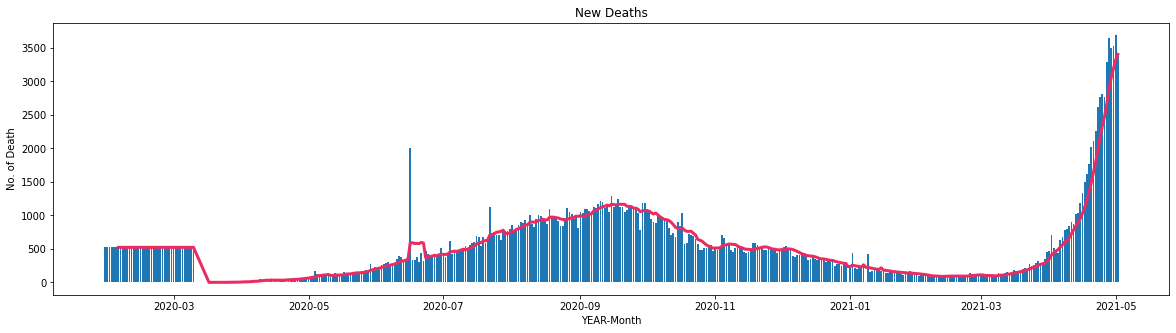

In [37]:
plt.figure(figsize=(20,5))
plt.bar(data_India['date'],data_India['new_deaths'])
plt.plot(data_India['date'],data_India['new_deaths'].rolling(7).mean(),c='#ea2c62',linewidth=3)
plt.xlabel("YEAR-Month")
plt.ylabel("No. of Death")
plt.title('New Deaths')
plt.show()

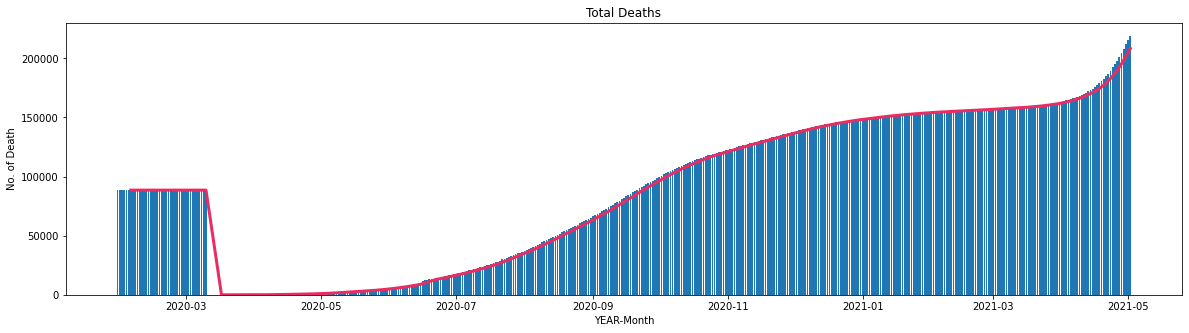

In [38]:
plt.figure(figsize=(20,5))
plt.bar(data_India['date'],data_India['total_deaths'])
plt.plot(data_India['date'],data_India['total_deaths'].rolling(7).mean(),c='#ea2c62',linewidth=3)
plt.xlabel("YEAR-Month")
plt.ylabel("No. of Death")
plt.title('Total Deaths')
plt.show()


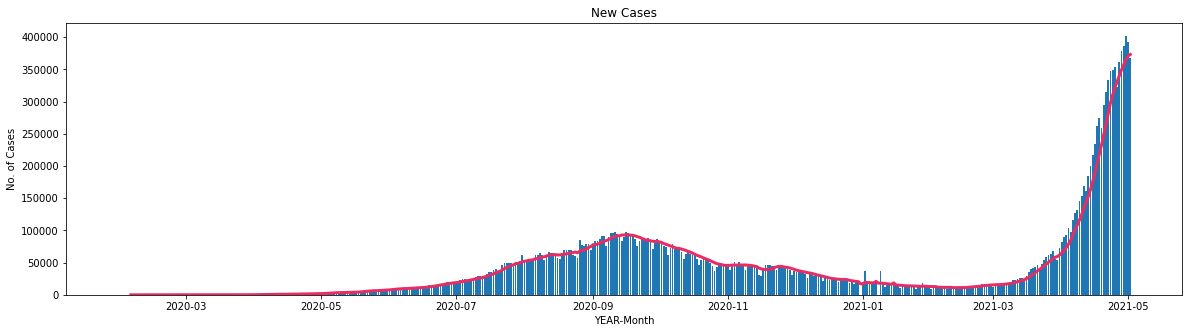

In [39]:
plt.figure(figsize=(20,5))
plt.bar(data_India['date'],data_India['new_cases'])
plt.plot(data_India['date'],data_India['new_cases'].rolling(7).mean(),c='#ea2c62',linewidth=3)
plt.xlabel("YEAR-Month")
plt.ylabel("No. of Cases")
plt.title('New Cases')
plt.show()

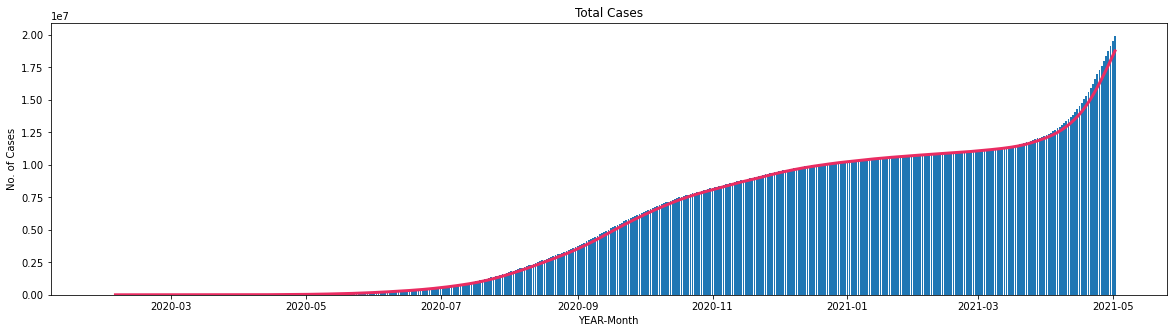

In [40]:
plt.figure(figsize=(20,5))
plt.bar(data_India['date'],data_India['total_cases'])
plt.plot(data_India['date'],data_India['total_cases'].rolling(7).mean(),c='#ea2c62',linewidth=3)
plt.xlabel("YEAR-Month")
plt.ylabel("No. of Cases")
plt.title('Total Cases')
plt.show()

**Step 5:Forcasting**

In [41]:
#data_India["date"] = data_India["date"].map(dt.datetime.fromordinal)
#data_India.head()

In [42]:
data_India_total_cases = data_India

data_India_total_deaths = data_India

**TOTAL CASES**

In [43]:
data_India_total_cases = data_India_total_cases.rename(columns={'date':'ds','total_cases':'y'})
data_India_total_cases.head()

,continent,location,ds,y,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IND,Asia,India,2020-01-30,1,1,41353.250795,88546,523,458.966978,0.001,0.001,29.966044,64.164266,0.379581,0.332568,1.187883,720561.484615,1.021769e+08,74.041015,NaN,690738.771499,0.50055,0.059776,24.494089,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-01-31,1,0,41353.250795,88546,523,458.966978,0.001,0.000,29.966044,64.164266,0.379581,0.332568,1.187883,720561.484615,1.021769e+08,74.041015,NaN,690738.771499,0.50055,0.059776,24.494089,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-01,1,0,41353.250795,88546,523,458.966978,0.001,0.000,29.966044,64.164266,0.379581,0.332568,1.187883,720561.484615,1.021769e+08,74.041015,NaN,690738.771499,0.50055,0.059776,24.494089,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-02,2,1,41353.250795,88546,523,458.966978,0.001,0.001,29.966044,64.164266,0.379581,0.332568,1.187883,720561.484615,1.021769e+08,74.041015,NaN,690738.771499,0.50055,0.059776,24.494089,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-03,3,1,41353.250795,88546,523,458.966978,0.002,0.001,29.966044,64.164266,0.379581,0.332568,1.187883,720561.484615,1.021769e+08,74.041015,NaN,690738.771499,0.50055,0.059776,24.494089,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


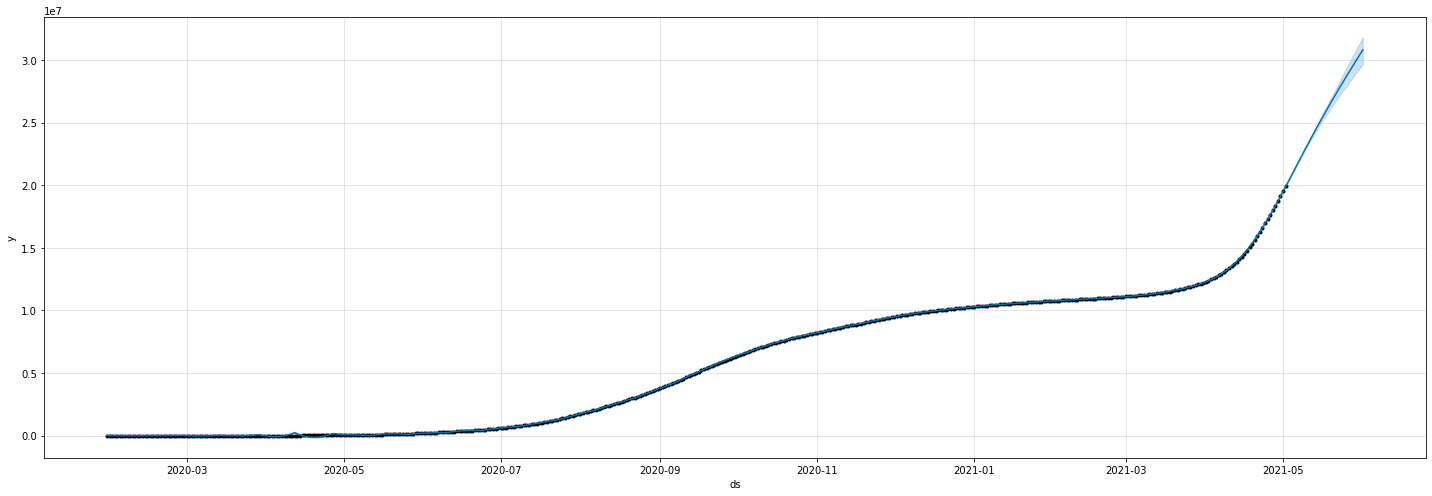

In [44]:
from fbprophet import Prophet
model2 = Prophet(changepoint_prior_scale=0.9,  yearly_seasonality=True , daily_seasonality=True)
model2.fit(data_India_total_cases)
forecast = model2.make_future_dataframe(periods=30,freq='D')
forecast = model2.predict(forecast)

model2.plot(forecast,figsize=(20,7));


In [45]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
484,2021-05-28,2.949919e+07,2.856849e+07,3.029408e+07,2.967936e+07,2.876604e+07,3.046932e+07
485,2021-05-29,2.983235e+07,2.886920e+07,3.067258e+07,2.983348e+07,2.886907e+07,3.066506e+07
486,2021-05-30,3.016158e+07,2.913178e+07,3.106338e+07,2.998760e+07,2.897090e+07,3.089094e+07
487,2021-05-31,3.048713e+07,2.940484e+07,3.146394e+07,3.014171e+07,2.904791e+07,3.110399e+07
488,2021-06-01,3.081621e+07,2.966581e+07,3.181145e+07,3.029583e+07,2.915325e+07,3.129657e+07


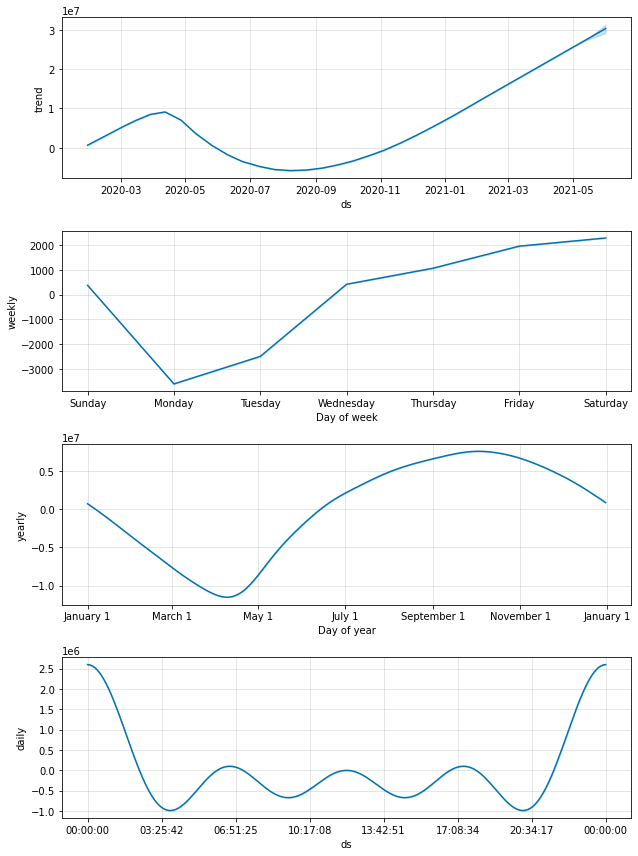

In [46]:
model2.plot_components(forecast);

The above images shows the trends and seasonality of the time series data. We can see there is an increasing trend, meaning the number of new cases has increased over time.

**TOTAL DEATHS**

In [47]:

data_India_total_deaths = data_India_total_deaths.rename(columns={'date':'ds','total_deaths':'y'})
data_India_total_deaths.head()

,continent,location,ds,total_cases,new_cases,new_cases_smoothed,y,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IND,Asia,India,2020-01-30,1,1,41353.250795,88546,523,458.966978,0.001,0.001,29.966044,64.164266,0.379581,0.332568,1.187883,720561.484615,1.021769e+08,74.041015,NaN,690738.771499,0.50055,0.059776,24.494089,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-01-31,1,0,41353.250795,88546,523,458.966978,0.001,0.000,29.966044,64.164266,0.379581,0.332568,1.187883,720561.484615,1.021769e+08,74.041015,NaN,690738.771499,0.50055,0.059776,24.494089,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-01,1,0,41353.250795,88546,523,458.966978,0.001,0.000,29.966044,64.164266,0.379581,0.332568,1.187883,720561.484615,1.021769e+08,74.041015,NaN,690738.771499,0.50055,0.059776,24.494089,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-02,2,1,41353.250795,88546,523,458.966978,0.001,0.001,29.966044,64.164266,0.379581,0.332568,1.187883,720561.484615,1.021769e+08,74.041015,NaN,690738.771499,0.50055,0.059776,24.494089,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
IND,Asia,India,2020-02-03,3,1,41353.250795,88546,523,458.966978,0.002,0.001,29.966044,64.164266,0.379581,0.332568,1.187883,720561.484615,1.021769e+08,74.041015,NaN,690738.771499,0.50055,0.059776,24.494089,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


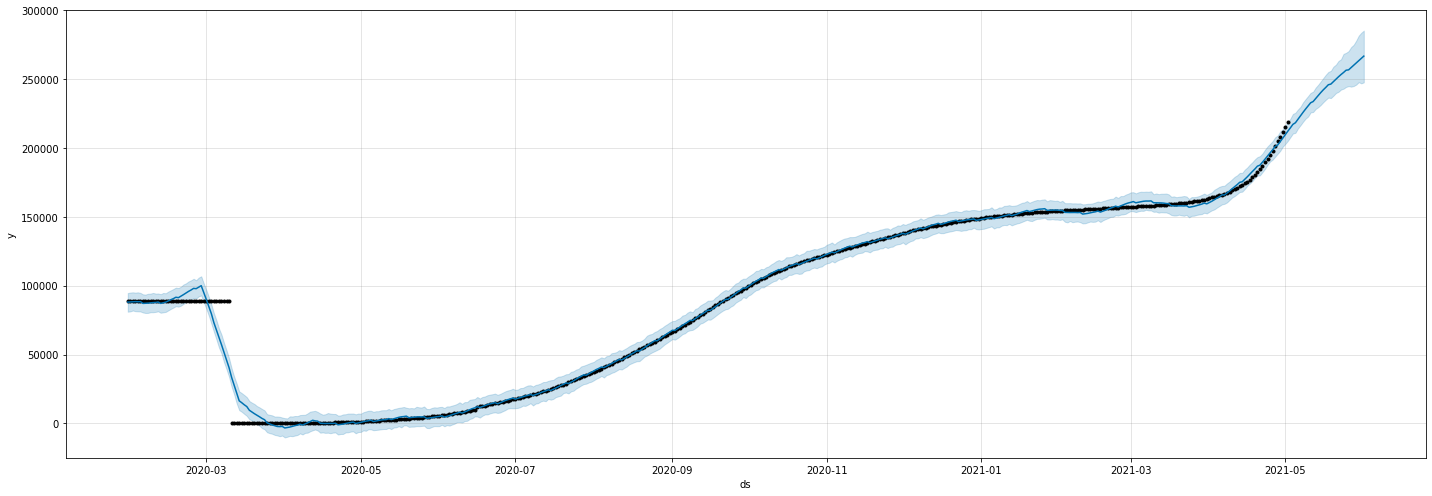

In [48]:
from fbprophet import Prophet
model4 = Prophet(changepoint_prior_scale=0.9,  yearly_seasonality=True , daily_seasonality=True)
model4.fit(data_India_total_deaths)
forecast = model4.make_future_dataframe(periods=30,freq='D')
forecast = model4.predict(forecast)

model4.plot(forecast,figsize=(20,7));


In the above graph, the blue line is the forecasted values and black dots are the actual values. We can see there are the black dot i.e the actual values are till May-2021 and as the model has forecasted for next 30 days i.e 1 month for which actual values are not available so, black dots are not present. 

**Total deaths will rise more than 300000 in next 30 days.**

In [49]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
484,2021-05-28,260086.427574,245062.806140,275024.294159,282057.714911,268918.852771,297028.314649
485,2021-05-29,261814.514081,246110.173138,278045.965362,283203.537924,269468.156536,299192.739362
486,2021-05-30,263470.789232,247864.440860,281673.939679,284349.360937,268570.502545,301108.502607
487,2021-05-31,265032.026755,247012.968669,283764.038420,285495.183950,268396.357911,303155.919028
488,2021-06-01,266804.887155,247712.771536,285361.704712,286641.006963,268593.567871,305429.628928


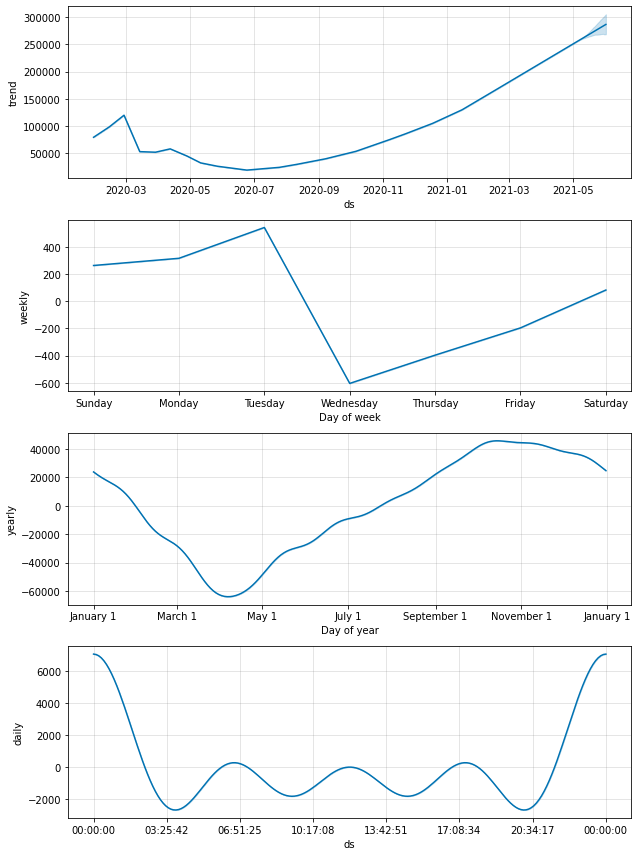

In [50]:
model4.plot_components(forecast);

The above images shows the trends and seasonality of the time series data. We can see there is an increasing trend, meaning the number of new cases has increased over time. 